In [1]:
# pip install pydotplus


Import Necessary Libraries

In [2]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

Load Dataset

In [3]:
df = pandas.read_csv("mlds.csv")

print(df)

     Score  Health  Relationship  Beauty  Living  Support  Outcome
0        1      10            10      10      10       10        4
1        1      10            10      10      10        5        4
2        1      10            10       5      10       10        4
3        1      10             5      10      10       10        4
4        1       5            10      10      10       10        4
5        0      10            10      10      10       10        3
6        0       1            10      10      10       10        2
7        0      10             5      10      10       10        3
8        0       1             5      10      10       10        2
9        1      10            10      10       5        5        3
10       1      10            10      10       5        1        3
11       1      10            10      10       1       10        3
12       1      10            10       5      10        5        3
13       1      10            10       5      10        1     

In [4]:
import graphviz 


Define X,y

In [5]:
features = ['Score', 'Health', 'Relationship', 'Beauty', 'Living', 'Support']

X = df[features]
y = df['Outcome']

print(X)
print(y)

     Score  Health  Relationship  Beauty  Living  Support
0        1      10            10      10      10       10
1        1      10            10      10      10        5
2        1      10            10       5      10       10
3        1      10             5      10      10       10
4        1       5            10      10      10       10
5        0      10            10      10      10       10
6        0       1            10      10      10       10
7        0      10             5      10      10       10
8        0       1             5      10      10       10
9        1      10            10      10       5        5
10       1      10            10      10       5        1
11       1      10            10      10       1       10
12       1      10            10       5      10        5
13       1      10            10       5      10        1
14       1      10            10       5       5       10
15       1      10            10       5       1       10
16       1    

Fit the Model and Save Decision Tree Map Image

In [6]:
import pydotplus

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features,
        filled=True, rounded=True,  
        special_characters=True)  
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('decisiontree.png')


True

serialize model to a file called model.pkl in order later  
with new unknown data so that we can predict the values later.

In [7]:
import pickle
pickle.dump(dtree, open("model.pkl","wb"))

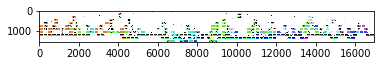

In [8]:
img=pltimg.imread('decisiontree.png')
imgplot = plt.imshow(img)
plt.show()

test runs

In [13]:
print(dtree.predict([[1, 2, 8, 8, 8, 8]]))

#Score  Health  Relationship  Beauty  Living  Support  
#1       4        8          8       8       4

[4]


In [14]:
print(dtree.predict([[1, 5, 5, 1, 5, 3]]))

[1]


In [11]:
print(dtree.predict([[1, 1, 3, 1, 5, 3]]))

[1]


In [12]:
print(dtree.predict([[1, 1, 1, 1, 3, 3]]))

[1]


In [13]:
print(dtree.predict([[0, 5, 5, 5, 5, 5]]))

[0]
